In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Handwritten_data/A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop('0', axis = 1)
Y = df['0']
print(X.shape)
print(len(df))

(372450, 784)
372450


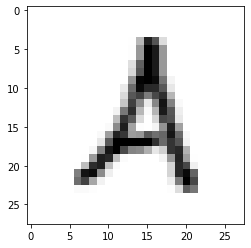

In [5]:
plt.imshow(X.iloc[10].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

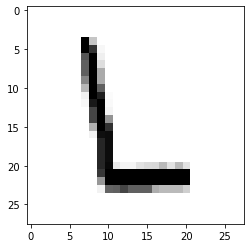

In [6]:
plt.imshow(X.iloc[100000].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [7]:
print(Y)

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64


In [8]:
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'} 
df['0'] = df['0'].map(alphabets_mapper)

In [9]:
Y = df['0']
Y

0         A
1         A
2         A
3         A
4         A
         ..
372445    Z
372446    Z
372447    Z
372448    Z
372449    Z
Name: 0, Length: 372450, dtype: object

In [10]:
Y.value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13869
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: 0, dtype: int64

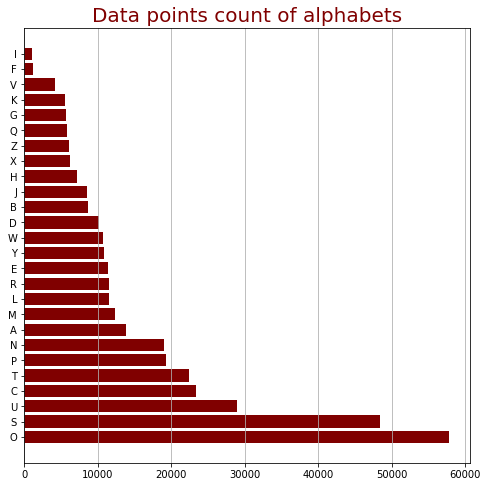

In [11]:
plt.rcParams['figure.figsize'] = (8, 8)   
plt.barh(Y.value_counts().index, Y.value_counts().values, color = 'maroon');
plt.title('Data points count of alphabets', fontsize = 20, color = 'maroon');
plt.grid(axis='x')

In [12]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.7, random_state = 1000)

sc = MinMaxScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [19]:
dmmy = pd.get_dummies(Y)
dmmy

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
372448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
y_train_dmmy = pd.get_dummies(y_train)
y_test_dmmy = pd.get_dummies(y_test)

In [16]:
y_train_dmmy.iloc[1].shape

(26,)

In [17]:
cls = Sequential()
cls.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
cls.add(MaxPooling2D(pool_size=(2, 2)))
cls.add(Dropout(0.3))
cls.add(Flatten())
cls.add(Dense(128, activation='relu'))
cls.add(Dense(len(Y.unique()), activation='softmax'))

In [18]:
cls.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                        

In [19]:
cls.predict(X_train[1:3])

array([[0.04290769, 0.03788526, 0.03559367, 0.03550494, 0.03596938,
        0.04129317, 0.0340787 , 0.04020061, 0.04044345, 0.04881836,
        0.03766559, 0.04313947, 0.03999547, 0.04013569, 0.03450474,
        0.04052059, 0.03892766, 0.03720466, 0.04284623, 0.03310999,
        0.03284787, 0.04412059, 0.03988256, 0.03297167, 0.0345702 ,
        0.03486171],
       [0.03969508, 0.0389335 , 0.0388653 , 0.03904767, 0.03712196,
        0.04035575, 0.03466936, 0.03902756, 0.04243426, 0.04736307,
        0.03824691, 0.03897198, 0.03727167, 0.03954433, 0.03910741,
        0.04421725, 0.04030108, 0.03565038, 0.0419974 , 0.03468158,
        0.03348777, 0.039036  , 0.03720187, 0.03524828, 0.03262878,
        0.0348938 ]], dtype=float32)

In [20]:
cls.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cls.fit(X_train, y_train_dmmy, validation_data=(X_test, y_test_dmmy), epochs=18, batch_size=200, verbose=2)

scores = cls.evaluate(X_test,y_test, verbose=0)
print("CNN Score:",scores[1])

Epoch 1/18
559/559 - 98s - loss: 0.3966 - accuracy: 0.8907 - val_loss: 0.1482 - val_accuracy: 0.9612 - 98s/epoch - 175ms/step
Epoch 2/18
559/559 - 85s - loss: 0.1324 - accuracy: 0.9629 - val_loss: 0.1158 - val_accuracy: 0.9695 - 85s/epoch - 153ms/step
Epoch 3/18
559/559 - 83s - loss: 0.1020 - accuracy: 0.9710 - val_loss: 0.0908 - val_accuracy: 0.9769 - 83s/epoch - 149ms/step
Epoch 4/18
559/559 - 86s - loss: 0.0827 - accuracy: 0.9766 - val_loss: 0.0887 - val_accuracy: 0.9776 - 86s/epoch - 154ms/step
Epoch 5/18
559/559 - 84s - loss: 0.0716 - accuracy: 0.9797 - val_loss: 0.0794 - val_accuracy: 0.9805 - 84s/epoch - 151ms/step
Epoch 6/18
559/559 - 82s - loss: 0.0619 - accuracy: 0.9818 - val_loss: 0.0741 - val_accuracy: 0.9822 - 82s/epoch - 147ms/step
Epoch 7/18
559/559 - 84s - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0766 - val_accuracy: 0.9818 - 84s/epoch - 150ms/step
Epoch 8/18
559/559 - 84s - loss: 0.0485 - accuracy: 0.9857 - val_loss: 0.0762 - val_accuracy: 0.9818 - 84s/epoch - 150

ValueError: ignored

In [21]:
scores = cls.evaluate(X_test,y_test_dmmy, verbose=0)
print("CNN Score:",scores[1])

CNN Score: 0.9860230684280396


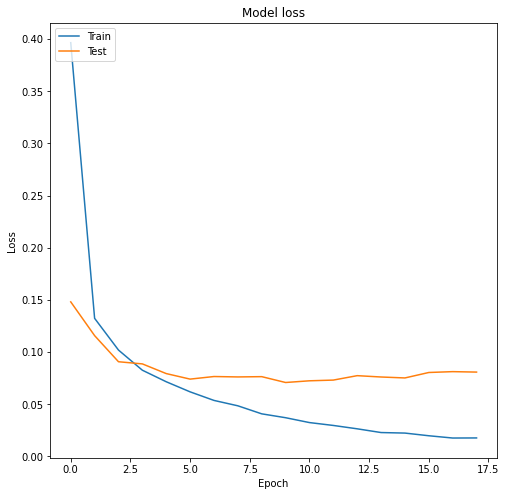

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
cls.save('/content/drive/MyDrive/Handwritten_data/my_model.h5')